In [1]:
%run init.ipynb
%run entropy.ipynb
%run ptr.ipynb
%run jupyterQ.ipynb

import qiskit

from qiskit import *

In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.save_account('407eee087e66afb971221353c2214710f90034665067ef91fefb09e98c6c99d94ff4f4f1c14131a196c09a5d24a4368e1aaa03b0f3d99578f0b8f47071995da6', overwrite = True)

In [4]:
qiskit.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [6]:
from qiskit.tools.monitor import backend_overview, backend_monitor

In [10]:
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 34             Pending Jobs: 21             Pending Jobs: 20
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      145.4          Avg. T1:      76.0           Avg. T1:      91.6
Avg. T2:      54.1           Avg. T2:      103.4          Avg. T2:      97.1



ibmq_lima                    ibmq_bogota                  ibmq_santiago
---------                    -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 16             Pending Jobs: 6              Pending Jobs: 2092
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True          

In [11]:
device = provider.get_backend('ibmq_belem')

from qiskit.tools.monitor import job_monitor
qr = QuantumRegister(2)
qc = qiskit.QuantumCircuit(qr); 
qc_cal = qiskit.QuantumCircuit(qr)
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = qc.qregs[0], circlabel = 'mmc')
cal_job = execute(cal_circuits, backend = device, shots = 8192, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_filter = meas_fitter.filter

61b096b7fd94262bc2c70a33
Job Status: job has successfully run


In [12]:
backend_monitor(device)

ibmq_belem
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 18
    backend_version: 1.0.29
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    n_uchannels: 8
    supported_features: ['q', 'o', 'b', 'j']
    pulse_num_channels: 9
    meas_map: [[0, 1, 2, 3, 4]]
    measure_esp_enabled: False
    description: 5 qubit device Belem
    qubit_channel_mapping: [['m0', 'u0', 'u1', 'd0'], ['d1', 'm1', 'u4', 'u1', 'u5', 'u3', 'u0', 'u2'], ['m2', 'd2', 'u4', 'u2'], ['u6', 'u5', 'u3', 'd3', 'm3', 'u7'], ['u6', 'd4', 'm4', 'u7']]
    discriminators: ['linear_discriminator', 'hw_centroid', 'quadratic_discriminator']
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}]]
    memory: True
    allow_object_

In [13]:
####first round

qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se = von_neumann_num(rho0_measE)


qc.cx(qr[0],qr[1]);
    
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je = von_neumann_num(rho0_meas3)



/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/home/marcos/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
/home/marcos/ana

61b09735bf880347e930a6a2
Job Status: job has successfully run
61b09832fd94266950c70a39
Job Status: job has successfully run


In [14]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie = np.zeros(N+1)
Ve = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/4, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/4, 0, 0, qr[0])
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    
    qc.cx(qr[0],qr[2]);
   
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve[j] = von_neumann_num(rho0_meas2)
    
    

61b09951fd9426e865c70a3d
Job Status: job has successfully run
61b09a58bf88035f4730a6ae
Job Status: job has successfully run
61b09b65aad5f338e09dcc5d
Job Status: job has successfully run
61b09b8ef15b0319739a30c6
Job Status: job has successfully run
61b09ca6a880fe19436469b1
Job Status: job has successfully run
61b09ce1a880fe3b4a6469b3
Job Status: job has successfully run
61b09d092e6f457f399c8c7b
Job Status: job has successfully run
61b09e18f15b03df7c9a30c9
Job Status: job has successfully run
61b09e3ff15b035b019a30cb
Job Status: job has successfully run
61b09e9bfd94267b36c70a4d
Job Status: job has successfully run
61b09ec12e6f452f5e9c8c82
Job Status: job has successfully run
61b09ee9f15b035b499a30cd
Job Status: job has successfully run
61b09f10dcbe23446d195129
Job Status: job has successfully run
61b09f39d73dea7e31374535
Job Status: job has successfully run
61b0a048d73dea7306374538
Job Status: job has successfully run
61b0a06fa880fe34156469bd
Job Status: job has successfully run
61b0a098

In [15]:
Rx = Ie - Se
Rxa = Je + Ie - Ve - Se

In [105]:
Rx

array([0.10160682, 0.13001628, 0.23671495, 0.32724622, 0.36770182,
       0.44240504, 0.51961754, 0.63113951, 0.67425774, 0.61383952,
       0.59663874])

In [23]:
Rxasq = np.zeros(N+1)

for j in range(0, N+1):
    Rxasq[j] += Rxa[j]*Rxa[j]


array([0.010217  , 0.01629849, 0.0551252 , 0.10811766, 0.14012641,
       0.21419164, 0.31788483, 0.48932569, 0.62362477, 0.60185824,
       0.66785424])

In [16]:
# second round

qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se1 = von_neumann_num(rho0_measE)


qc.cx(qr[0],qr[1]);
    
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je1 = von_neumann_num(rho0_meas3)


61b0a2c6bf8803f19630a6c3
Job Status: job has successfully run
61b0a3d6ac813a8690fabac1
Job Status: job has successfully run


In [17]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie1 = np.zeros(N+1)
Ve1 = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/4, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/4, 0, 0, qr[0])
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie1[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    
    qc.cx(qr[0],qr[2]);
   
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve1[j] = von_neumann_num(rho0_meas2)
    
    

61b0a405d73dea88ad37453f
Job Status: job has successfully run
61b0a515f15b0349fb9a30d9
Job Status: job has successfully run
61b0a547ac813a61fefabac5
Job Status: job has successfully run
61b0a570dcbe23865d19513a
Job Status: job has successfully run
61b0a5a12e6f4524989c8c92
Job Status: job has successfully run
61b0a5d3aad5f350569dcc78
Job Status: job has successfully run
61b0a6e0f15b030df99a30df
Job Status: job has successfully run
61b0a70aac813a896efabac6
Job Status: job has successfully run
61b0a73cfd94266c27c70a62
Job Status: job has successfully run
61b0a778dcbe2306e5195143
Job Status: job has successfully run
61b0a7a8ac813a417efabac9
Job Status: job has successfully run
61b0a7d1d73dea38a4374548
Job Status: job has successfully run
61b0a804fd94263491c70a63
Job Status: job has successfully run
61b0a835a880fe7ede6469ce
Job Status: job has successfully run
61b0a85eaad5f3b54b9dcc7d
Job Status: job has successfully run
61b0a891d73dea5da637454c
Job Status: job has successfully run
61b0a8c2

In [18]:
Rx1 = Ie1 - Se1
Rxa1 = Je1 + Ie1 - Ve1 - Se1

In [21]:
Rx

array([0.13113877, 0.16762386, 0.25602871, 0.35144582, 0.44505863,
       0.51168232, 0.57396577, 0.6089588 , 0.62333287])

In [22]:
Rx1

array([0.10942301, 0.1523124 , 0.23465176, 0.31871397, 0.42427743,
       0.49476806, 0.57210306, 0.60693147, 0.6069992 ])

In [47]:
Rxa2

array([0.13473568, 0.17395395, 0.21898175, 0.31169146, 0.39244085,
       0.48585333, 0.57337698, 0.66257514, 0.74579984, 0.819175  ,
       0.88359934])

In [19]:
# third round
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se2 = von_neumann_num(rho0_measE)


qc.cx(qr[0],qr[1]);
    
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je2 = von_neumann_num(rho0_meas3)


61b0a947aad5f3027a9dcc7f
Job Status: job has successfully run
61b0a9752e6f4589579c8c9d
Job Status: job has successfully run


In [45]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie2 = np.zeros(N+1)
Ve2 = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/4, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/4, 0, 0, qr[0])
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie2[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    
    qc.cx(qr[0],qr[2]);
   
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve2[j] = von_neumann_num(rho0_meas2)


61b0b391bd9cd20ff456bc94
Job Status: job has successfully run
61b0b3bdac813a7ba2fabb12
Job Status: job has successfully run
61b0b3ed2e6f45acaa9c8cd2
Job Status: job has successfully run
61b0b41fd73dea2c7f374598
Job Status: job has successfully run
61b0b452f15b03521d9a312d
Job Status: job has successfully run
61b0b48fac813aba31fabb19
Job Status: job has successfully run
61b0b4c92e6f4534729c8cd8
Job Status: job has successfully run
61b0b4fcf15b0330d29a3133
Job Status: job has successfully run
61b0b52dbd9cd21e0956bc9c
Job Status: job has successfully run
61b0b56adcbe23517c195199
Job Status: job has successfully run
61b0b59dbd9cd290aa56bc9e
Job Status: job has successfully run
61b0b5cea880fe0ad4646a17
Job Status: job has successfully run
61b0b5f52e6f4554e39c8ce1
Job Status: job has successfully run
61b0b628f15b034dcf9a313a
Job Status: job has successfully run
61b0b659dcbe23e62719519f
Job Status: job has successfully run
61b0b697f15b03a5339a313b
Job Status: job has successfully run
61b0b6d2

In [50]:
Rx2 = Ie2 - Se2
Rxa2 = Je2 + Ie2 - Ve2 - Se2

In [48]:
# fourth round
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


qc.h(qr[0])

qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev = qiskit.execute(qst_qc, backend = device, shots = 8192); # executes the qst
print(job_dev.job_id());
job_monitor(job_dev);
job_dev_mit = meas_filter.apply(job_dev.result(), method='least_squares'); # error mitigation
qstf_qc_dev = StateTomographyFitter(job_dev_mit, qst_qc); # fits the data to extract rho
rho10_measE = qstf_qc_dev.fit(method = 'lstsq');
rho0_measE = pTraceL_num(2, 2, rho10_measE)

Se3 = von_neumann_num(rho0_measE)


qc.cx(qr[0],qr[1]);
    
qst_qc3 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job_dev3 = qiskit.execute(qst_qc3, backend = device, shots = 8192); # executes the qst
print(job_dev3.job_id());
job_monitor(job_dev3);    
job_dev_mit3 = meas_filter.apply(job_dev3.result(), method='least_squares'); # error mitigation
qstf_qc_dev3 = StateTomographyFitter(job_dev_mit3, qst_qc3); # fits the data to extract rho
rho10_meas3 = qstf_qc_dev3.fit(method='lstsq'); 
rho0_meas3 = pTraceL_num(2, 2, rho10_meas3); #print('Pi(rho) = ', rho0_meas)

Je3 = von_neumann_num(rho0_meas3)


61b0c873ac813a7c95fabb74
Job Status: job has successfully run
61b0c8fdbd9cd2b70456bcf7
Job Status: job has successfully run


In [47]:
qr = QuantumRegister(3); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

Ie3 = np.zeros(N+1)
Ve3 = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
    
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/4, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/4, 0, 0, qr[0])
      
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = 8192); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);    
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_meas1 = qstf_qc_dev1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)
   
    Ie3[j] = von_neumann_num(rho0_meas1) # C with reference to sigma_x
    
    
    qc.cx(qr[0],qr[2]);
   
    qst_qc2 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = 8192); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);    
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2, qst_qc2); # fits the data to extract rho
    rho10_meas2 = qstf_qc_dev2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)
 
    Ve3[j] = von_neumann_num(rho0_meas2)


61b0bdffac813ad92dfabb4f
Job Status: job has successfully run
61b0bffe2e6f45441c9c8d14
Job Status: job has successfully run
61b0c07ebf88034f0b30a74d
Job Status: job has successfully run
61b0c0f0a880fe6a04646a50
Job Status: job has successfully run
61b0c137d73dea33bc3745d8
Job Status: job has successfully run
61b0c173a880fedc8b646a54
Job Status: job has successfully run
61b0c1aeaad5f366259dcd12
Job Status: job has successfully run
61b0c1eb2e6f4546689c8d21
Job Status: job has successfully run
61b0c2262e6f45e4649c8d23
Job Status: job has successfully run
61b0c24faad5f373ae9dcd16
Job Status: job has successfully run
61b0c275aad5f3921c9dcd17
Job Status: job has successfully run
61b0c29fa880fe1ac4646a59
Job Status: job has successfully run
61b0c2c6d73dea83453745e2
Job Status: job has successfully run
61b0c2eff15b0315819a3177
Job Status: job has successfully run
61b0c317f15b037b069a3178
Job Status: job has successfully run
61b0c33edcbe23793c1951e8
Job Status: job has successfully run
61b0c368

In [51]:
Rx3 = Ie3 - Se3
Rxa3 = Je3 + Ie3 - Ve3 - Se3



In [54]:
import numpy as np


Rxav = (Rx + Rx1+ Rx2+ Rx3)/4
Rxaav = (Rxa + Rxa1 + Rxa2 + Rxa3)/4

A = (Rx**2 + Rx1**2 + Rx2**2 + Rx3**2)
B = (Rxa**2 + Rxa1**2 + Rxa2**2 + Rxa3**2)


VarRx = np.sqrt(0.25*A - Rxav**2)
VarRa = np.sqrt(0.25*B - Rxaav**2)





In [55]:
VarRx

array([0.01131566, 0.00730057, 0.00788287, 0.01243085, 0.00825829,
       0.00979958, 0.00207262, 0.00587026, 0.00728593])

In [39]:
qr = QuantumRegister(5); 
qc = qiskit.QuantumCircuit(qr);

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


th_min = 0; th_max = math.pi/2; N = 8; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)

I = np.zeros(N+1)
V = np.zeros(N+1)
J = np.zeros(N+1)

for j in range(0, N+1):
    qr = QuantumRegister(5)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    
    qc.h(qr[0])
       
    qc.u(th1, ph1, lb1, qr[1]); #print('prep = ',th1, ph1, lb1)
    qc.u(math.pi/4, math.pi, -math.pi, qr[0])
    qc.cz(qr[0], qr[1]);
    qc.u(math.pi/4, 0, 0, qr[0])
        
    #print('meas = ',th2, ph2, lb2)
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho10_meas = qstf_qc.fit(method='lstsq'); 
    rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
    
    I[j] = von_neumann_num(rho0_meas) # C with reference to sigma_x
    
    
    qc.cx(qr[0],qr[2]);
    
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[2]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc1, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc1 = StateTomographyFitter(job.result(), qst_qc1) # fits the data to extract rho
    rho10_meas1 = qstf_qc1.fit(method='lstsq'); 
    rho0_meas1 = pTraceL_num(2, 2, rho10_meas1); #print('Pi(rho) = ', rho0_meas)

    V[j] = von_neumann_num(rho0_meas1)
    
    qc.h(qr[3])
    
    qc.cx(qr[3],qr[4]);
    
    qst_qc2 = state_tomography_circuits(qc, [qr[3],qr[4]]) # defines the qcircuit to make qst
    
    job = qiskit.execute(qst_qc2, Aer.get_backend('qasm_simulator'), shots = 8192) # executes the qst
    qstf_qc2 = StateTomographyFitter(job.result(), qst_qc2) # fits the data to extract rho
    rho10_meas2 = qstf_qc2.fit(method='lstsq'); 
    rho0_meas2 = pTraceL_num(2, 2, rho10_meas2); #print('Pi(rho) = ', rho0_meas)

    J[j] = von_neumann_num(rho0_meas2)


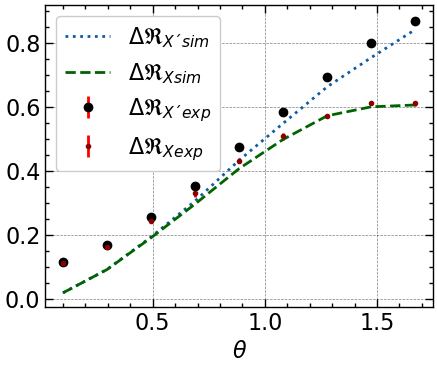

In [59]:
import matplotlib
plt.style.use(['science', 'notebook', 'grid'])    
  
    
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
#plt.plot(thv, Pv, 'o--',label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, J + I - V, ':', label = r'$\Delta \mathfrak{R}_{X´sim}$')
plt.plot(thv, I, '--', color = "darkgreen" ,label = r'$\Delta \mathfrak{R}_{X sim}$')
plt.errorbar(thv, Rxaav, yerr = VarRa, color = "black" ,fmt = 'o', ecolor = 'red', label = r'$\Delta \mathfrak{R}_{X´exp}$')
plt.errorbar(thv, Rxav, yerr = VarRx, color = "darkred" ,fmt = '.', ecolor = 'red', label =  r'$\Delta \mathfrak{R}_{X exp}$'); 
#plt.plot(thv, Je + Ie - Ve - Se, 'o', label = r'$\Delta \mathfrak{R}_{X´exp}$')
#Plt.plot(thv, Ie - Se, '^', label = r'$\Delta \mathfrak{R}_{X exp}$')

#plt.plot(thv, IE, 'rx:', label = r'$\mathcal{R}_E$')

#plt.plot(thv, PvE, ':', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
    #plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'best')
plt.savefig('varexp2.pdf', format='pdf',dpi = 1200, bbox_inches='tight')
plt.show()